### Common algorithms tutorial

As data are provided and you have processed data with preprocessing step like standard, MinMaxScaler, etc. steps to make data that could be used to train your model, so next thing should be considerred is that which algorithms that you should use? As there are really many algorithms for each question! You should just try some common algorirthms first!

Here I just come up with some common algorithms that I would use for training the model, in fact, this tutorial is used to make you know what algorithms that you could or should use first, the logic of each algorithm I will teach you when I have time!

One thing to notice that for writing the code is not the most difficult part, the logic and inherent logic of each algorithm is hardest! But you know what? most people don't know the how each algorithm works, they just use it! so don't worry about the math, I will teach you!

This tutorial will focus on both **classification, regression and clustering** problems, this is just your plan for this month! You should implement with bellow tutorial to be familar with these algorithms!

Here I List the common algorithms for each problem(You will notice that for both classification and regression, some algorithms could be both used!):

**Classification**
    
1. Logistic Regression
2. Decision Tree
3. KNN
4. Random Forest
5. Gradient Boosting Tree
6. SVM(support vector classifier)
7. Adaboost

**Regression**

1. Linear Regression
2. SVR(support vector regression)
3. Decision Tree regression
4. KNN regression
5. Random Forest regression
6. Gradient boosting tree regression

**Clustering**

1. KMeans

Here we start!

In [59]:
# import modules
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# this is the algirithms that we could use for classification, regression, clustering!
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

# preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# decomposition
from sklearn.decomposition import PCA

# for model selection
from sklearn.model_selection import train_test_split, GridSearchCV
# to make pipeline
from sklearn.pipeline import make_pipeline
# to evaluate our model
from sklearn import metrics

warnings.simplefilter('ignore')

#### Classification problem

In [13]:
# Here I just use the digits data sets with sklearn
# One thing you should notice is that what the most important part is how to use each algorithm
# for data set is really easy to load! Just with pandas
x, y = load_digits(return_X_y=True)

# get info of data
print("How many samples: %d" % len(x))
print("How many unique labels: %d " % len(np.unique(y)))
print("Unique label list:", np.unique(y))
print("Data shape: ", x.shape)

# as you could see that what we need to do is just to make a classifier 
# to inference a new data with 64 Dimension for each label it belongs to!

How many samples: 1797
How many unique labels: 10 
Unique label list: [0 1 2 3 4 5 6 7 8 9]
Data shape:  (1797, 64)


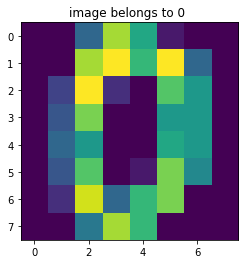

In [12]:
# Here I just sample one data to show you want data we have
sample_data = x[0]
sample_label = y[0]

plt.imshow(sample_data.reshape(8, 8))
plt.title("image belongs to %d " % sample_label)

plt.show()

In [21]:
# as the data is really easy to classifier, so here just add some noise[gaussian noise] to the data
# Gaussian noise with mean 3, standard diviation 4
x = x + np.random.normal(loc=3, scale=4, size=x.shape)

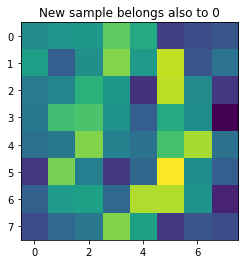

In [22]:
# you would wonder, after add the noise, what data becomes for new?
sample_data_new = x[0]

plt.imshow(sample_data_new.reshape(8, 8))
plt.title("New sample belongs also to %d" % sample_label)

plt.show()

# you see? not as good enough as before, right? Not easy for us also for machine learning

In [23]:
# first thing we should split the data to train and test data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=1234)

In [29]:
# with easy model to build baseline
# you should remember what is *baseline*! baseline is just means that if we use 
# machine learning, how much accuracy that we could get

# Here I just make logistic regression without parameters choosen as baseline
lr = LogisticRegression()

# fit model
lr.fit(xtrain, ytrain)

# get the predictioni
pred_lr = lr.predict(xtest)

base_score = metrics.accuracy_score(ytest, pred_lr)
# you see, the baseline is just 83% accuracy
print("Baseline model accuracy: ", metrics.accuracy_score(ytest, pred_lr))

Baseline model accuracy:  0.8277777777777777


In [42]:
# here I just make the helper function to evaluate the model
def evaluate_estimator(name, score):
    # how much improvement compare with baseline
    impro_ratio = (score - base_score) / base_score * 100
    
    print("For model %s, accuracy score: %.2f, with improment %.2f %s." % (name, score, impro_ratio, "%"))

#### SVC

In [43]:
clf = SVC()

clf.fit(xtrain, ytrain)

pred_clf = clf.predict(xtest)

score_clf = metrics.accuracy_score(ytest, pred_clf)
# for svm, the most powful machine leaning algrithm, the accuracy is just 7%? kidding? but how this happen?
print("Accuracy for SVC: ", metrics.accuracy_score(ytest, pred_clf))

evaluate_estimator(clf.__class__.__name__, score_clf)

Accuracy for SVC:  0.07777777777777778
For model SVC, accuracy score: 0.08, with improment -90.60 %.


In [44]:
# in fact, the reason for svm, accuracy is so low is that svm suppose the data should be standard[Guassian!]
# so here I just make data to be standard!

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(xtrain)

xtrain_scaler = scaler.transform(xtrain)
# you have to transform test data according train data!
xtest_scaler = scaler.transform(xtest)

# refit svm
clf.fit(xtrain_scaler, ytrain)

pred_clf_new = clf.predict(xtest_scaler)

score_clf_new = metrics.accuracy_score(ytest, pred_clf_new)
# you see? the accuracy is 90%!!! so great! do you feel the preprossing is really important right?
print("Accuracy for SVC new:", clf.score(xtest_scaler, ytest))

# we do improve the model result!
evaluate_estimator(clf.__class__.__name__, score_clf_new)

Accuracy for SVC new: 0.9
For model SVC, accuracy score: 0.90, with improment 8.72 %.


#### KNN

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(xtrain, ytrain)

pred_knn = knn.predict(xtest)

score_knn = metrics.accuracy_score(ytest, pred_knn)

# for knn, we also get 90% accuracy, so good!
evaluate_estimator(knn.__class__.__name__, score_knn)

For model KNeighborsClassifier, accuracy score: 0.90, with improment 8.72 %.


In [47]:
# Here I just make grid search to find the best parameter: n_neighbors
param_grid = {"n_neighbors":[3, 5, 9, 10, 20]}

grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)

# fit the grid with cross-validation
grid.fit(xtrain, ytrain)

# get the best estimator
knn_best = grid.best_estimator_

print("Get best parameter: ", grid.best_params_)

pred_knn_grid = knn_best.predict(xtest)

score_knn_grid = metrics.accuracy_score(ytest, pred_knn_grid)

# even if we use grid search to find the best parameter, we still get 90% accuracy, so I stop to try with KNN
evaluate_estimator(knn.__class__.__name__, score_knn_grid)

Get best parameter:  {'n_neighbors': 20}
For model KNeighborsClassifier, accuracy score: 0.90, with improment 8.39 %.


#### Random Forest

In [48]:
rfc = RandomForestClassifier()

rfc.fit(xtrain, ytrain)

pred_rfc = rfc.predict(xtest)

score_rfc = metrics.accuracy_score(ytest, pred_rfc)

# you see? even the ensemble great model random forest, we don't get much improment! not good than baseline!
# one thing to notice that the data is changed by myself, in fact for real data, random forest is really algorithm that
# should try!
evaluate_estimator(rfc.__class__.__name__, score_rfc)

For model RandomForestClassifier, accuracy score: 0.78, with improment -6.04 %.


In [51]:
# I just want to tune the n_estimator parameter for random forest
param_grid = {"n_estimators": [10, 30, 50, 100, 200, 300]}

grid = GridSearchCV(estimator=rfc, param_grid = param_grid, cv=10)

grid.fit(xtrain, ytrain)

rfc_best = grid.best_estimator_
print("Get best parameter: ", grid.best_params_)

pred_rfc_grid = rfc_best.predict(xtest)

score_rfc_grid = metrics.accuracy_score(ytest, pred_rfc_grid)

# you see? even if we use random forest, we still improve the model accuracy to 90%! with parameter chosen!
evaluate_estimator(rfc_best.__class__.__name__, score_rfc_grid)

Get best parameter:  {'n_estimators': 300}
For model RandomForestClassifier, accuracy score: 0.90, with improment 8.72 %.


#### Gradient boosting Tree

In [53]:
gbc = GradientBoostingClassifier()

gbc.fit(xtrain, ytrain)

pred_gbc = gbc.predict(xtest)

score_gbc = metrics.accuracy_score(ytest, pred_gbc)

# enha, with just default with improment 1.68%
evaluate_estimator(gbc.__class__.__name__, score_gbc)

For model GradientBoostingClassifier, accuracy score: 0.84, with improment 1.68 %.


#### Adaboost

In [60]:
abc = AdaBoostClassifier()

abc.fit(xtrain, ytrain)

pred_abc = abc.predict(xtest)

score_abc = metrics.accuracy_score(ytest, pred_abc)

# even the adaboost is also an ensemble algorithm, not too good...
evaluate_estimator(abc.__class__.__name__, score_abc)

For model AdaBoostClassifier, accuracy score: 0.71, with improment -14.43 %.


#### Decision Tree

In [62]:
dtc = DecisionTreeClassifier()

dtc.fit(xtrain, ytrain)

pred_dtc = dtc.predict(xtest)

score_dtc = metrics.accuracy_score(ytest, pred_abc)

# decision tree not work well on this dataset!
evaluate_estimator(abc.__class__.__name__, score_dtc)

For model AdaBoostClassifier, accuracy score: 0.71, with improment -14.43 %.


### Important thing to notice

As here I just work with some sample datasets, also I add some noise to the data that make some algorithms not work well on this dataset, but in real life, there isn't one alogrithm could beat whole other algorithms!!!

So that we have to try many algorithms to find which algorithms do well on the dataset you are given! 

Here I just list some really common algorithm that could be used in real work life! One thing to notice that in fact I don't try many preprocessing step aka feature engineering step, but the feature engineering is the most important part! You should remember that!

### Regression problem

In [65]:
# here I just make the boston house price sample data
from sklearn.datasets import load_boston

x, y = load_boston(return_X_y=True)

# get data info
print("Data shape: ", x.shape)

Data shape:  (506, 13)


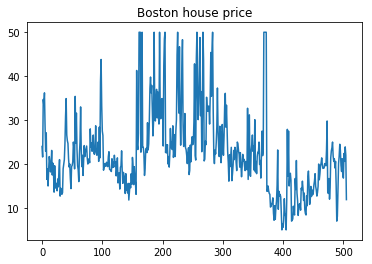

In [66]:
# plot the label to get insight what regression problem that we need to fit
plt.plot(y)
plt.title("Boston house price")

# you see? maybe there is some trends in the data
plt.show()

In [68]:
# we should split data to train and test data
# we couldn't use random_split to get train and data,
# as we need to make train data to start from the really beginner to some position
# test data will start that position to the end

# I just want to make the train data from 0 to 480, you could change that
position = 480

xtrain, ytrain = x[:position], y[:position ]
xtest, ytest = x[position: ], y[position: ]

In [71]:
# first make baseline score
# here just use Linear regression
lr = LinearRegression()

# start to fit model
lr.fit(xtrain, ytrain)

pred_lr = lr.predict(xtest)

rmse_base = np.sqrt(metrics.mean_squared_error(ytest, pred_lr))

print("Baseline RMSE: ", rmse_base)

Baseline RMSE:  3.8617839951801156


In [78]:
# here I just use *root mean sqaure error* function to evaluate the model
def evaluate_reg(estimator, pred):
    est_name = estimator.__class__.__name__
    rsme = np.sqrt(metrics.mean_squared_error(ytest, pred))
    imp_ratio = (rmse_base - rsme) / rsme
    print("For estimator: %s, Root mean sqaure error is %.2f, with improment: %.2f" % (est_name, rsme, imp_ratio))

#### KNN regression

In [79]:
knn_re = KNeighborsRegressor()

knn_re.fit(xtrain, ytrain)

pred_knn = knn_re.predict(xtest)

# with KNN regression, not too good...
evaluate_reg(knn_re, pred_knn)

For estimator: KNeighborsRegressor, Root mean sqaure error is 4.79, with improment: -0.19


In [84]:
param_grid = {"n_neighbors":[3, 5, 10, 20, 40, ]}

grid = GridSearchCV(estimator=knn_re, param_grid=param_grid, cv=10)

grid.fit(xtrain, ytrain)

knn_re_best = grid.best_estimator_
print("Get best parameter: ", grid.best_params_)

pred_knn_grid = knn_re_best.predict(xtest)

# even with grid seach, without any improment
evaluate_reg(knn_re_best, pred_knn_grid)

Get best parameter:  {'n_neighbors': 20}
For estimator: KNeighborsRegressor, Root mean sqaure error is 5.05, with improment: -0.23


#### Random Forest Regression

In [85]:
rfr = RandomForestRegressor()

rfr.fit(xtrain, ytrain)

pred_rfr = rfr.predict(xtest)

# with random forest regression, not improvement!
evaluate_reg(rfr, pred_rfr)

For estimator: RandomForestRegressor, Root mean sqaure error is 4.62, with improment: -0.16


In [86]:
# if you find that your code take much time!, you shouldn't make too many parameter to try
param_grid = {"n_estimators": [10, 50, 100, 200, 250]}

grid = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10)

grid.fit(xtrain, ytrain)

rfr_best = grid.best_estimator_
print("Get best parameter:", grid.best_params_)

pred_rfr_grid = grid.predict(xtest)

# even with grid seach, not improment!
evaluate_reg(rfr_best, pred_rfr_grid)

Get best parameter: {'n_estimators': 250}
For estimator: RandomForestRegressor, Root mean sqaure error is 4.51, with improment: -0.14


#### Gradient boosting regression

In [87]:
gbr = GradientBoostingRegressor()

gbr.fit(xtrain, ytrain)

pred_gbr = gbr.predict(xtest)

# not too good
evaluate_reg(gbr, pred_gbr)

For estimator: GradientBoostingRegressor, Root mean sqaure error is 4.21, with improment: -0.08


#### Decision Tree regression

In [88]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,  ytrain)

pred_dtr = dtr.predict(xtest)

evaluate_reg(dtr, pred_dtr)

For estimator: DecisionTreeRegressor, Root mean sqaure error is 4.54, with improment: -0.15


#### One thing to notice

You find that for the regression problem, the best algorithm is linear regression, but in fact, you should really do some feature engineering step during the model training step! I don't do any feature engineering for the use case to show you the common algorithms for regression!

#### Clustering

What is clustering? suppose you have 100000 samples as people, you want to come up with an algorithm to split these data to  3 parts, each cluster means different group like teen, adult and older like something, but we don't have the true label each sample belongs to which cluster! so for Clustering problem, it is called **Unsupervised Learning**!

In [89]:
# here I just use iris data
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)

# in fact for clustering, we don't need to split data to train and test, as we don't have the true label for each sample!

In [90]:
kmeans = KMeans(n_clusters=3, random_state=123)

# fit the model
kmeans.fit(x)

# get the prediction for each sample, means which class it belongs to 
pred_kmeans = kmeans.predict(x)

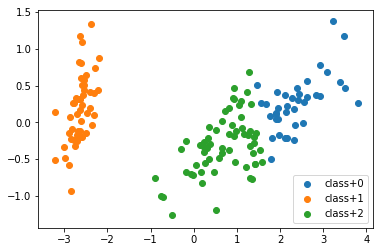

In [93]:
# as I want to show you the plot for each class that the model prediction, 
# so here I use PCA to make data to 2D for plotting
pca = PCA(n_components=2)

pca.fit(x)

x_pca = pca.transform(x)

# plot the data for each sample
for i in range(3):
    plt.scatter(x_pca[i== pred_kmeans, 0], x_pca[i == pred_kmeans, 1], label= "class+" + str(i))
    
plt.legend()
plt.show()

### Final words

You could see that we do make the clustering problem good, as each different class do seperate apart with each other! But as we don't have the label, so if we need to get the info that which class belongs to what category, so we have to manually check the data and label, so that we could get the insight! 

So that's the the whole parts for classification, regression and clustering common algorithms, in fact, for each part, there are many other algorithms that we could use! 

Keep tuned, I will show you more!